## Define the colums: 
> About this dataset
> Age : Age of the patient
> 
> Sex : Sex of the patient
> 
> exang: exercise induced angina (1 = yes; 0 = no)
> 
> ca: number of major vessels (0-3)
> 
> cp : Chest Pain type chest pain type
> 
> Value 1: typical angina
> Value 2: atypical angina
> Value 3: non-anginal pain
> Value 4: asymptomatic
> trtbps : resting blood pressure (in mm Hg)
> 
> chol : cholestoral in mg/dl fetched via BMI sensor
> 
> fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
> 
> rest_ecg : resting electrocardiographic results
> 
> Value 0: normal
> Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
> Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
> thalach : maximum heart rate achieved
> 
> target : 0= less chance of heart attack 1= more chance of heart attack n

# Loding liberary

In [1]:
# liberary for preper the data
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
## liberary for modling
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Loading Dataset

In [2]:
df=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [43]:
df.head(10).style.background_gradient(cmap = 'copper')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().style.background_gradient(cmap = 'copper')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().count()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

## Make some of Analysis to explain the data

In [8]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


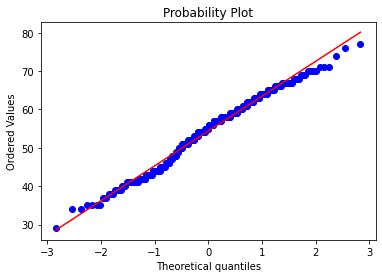

In [9]:
fig = ff.create_distplot([df.age],['age'],bin_size=5)
iplot(fig, filename='Basic Distplot')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['age'], plot=plt)
plt.show()

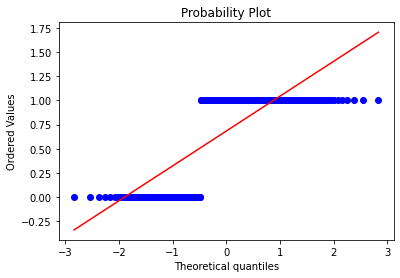

In [10]:
fig = ff.create_distplot([df.age],['sex'],bin_size=5)
iplot(fig, filename='Basic Distplot')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['sex'], plot=plt)
plt.show()

Heatmap


<AxesSubplot:>

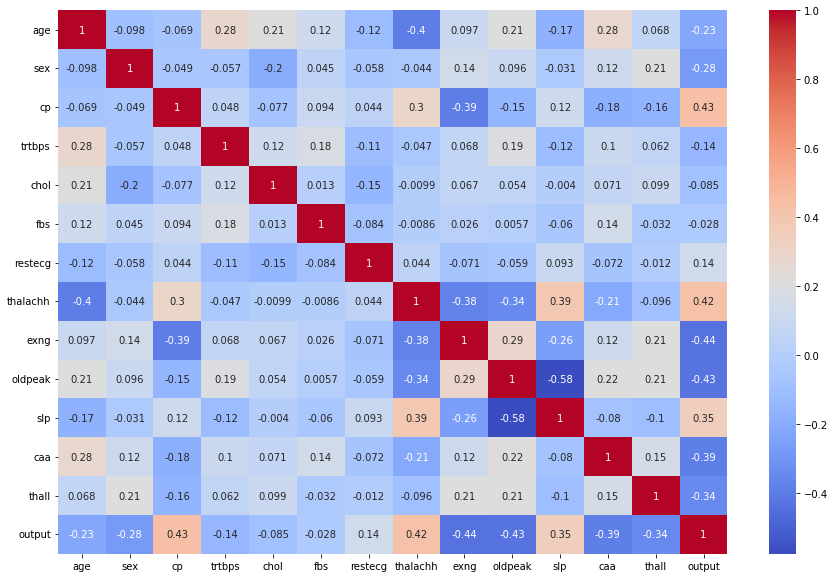

In [11]:
print('Heatmap')
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [12]:
fig = px.histogram(df, x="age",color="output",
                   marginal="box",
                   hover_data=df.columns,
                  color_discrete_sequence=['#f64c72','#85bfdc'])
fig.update_layout(
    title="Heart attack chance corresponding to age"
)
fig.show()

In [13]:
fig = px.histogram(df, x="age",color="exng",
                   marginal="box",
                   hover_data=df.columns,
                  color_discrete_sequence=['#f64c72','#85bfdc'])
fig.update_layout(
    title="Heart attack chance corresponding to age"
)
fig.show()

In [14]:
fig = px.scatter_3d(df, x='age', y='thalachh', z='exng',
              color='output',size='trtbps',color_discrete_sequence=['#f64c72','#85bfdc'])
fig.show()

## Making Classification using Machine Learning

In [15]:
# spliting the data
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
print("Shape of X",x.shape)
print("Shape of y",y.shape)

Shape of X (303, 13)
Shape of y (303,)


In [17]:
# Splait the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [18]:
print("Shape of the data after making split:",X_train.shape)
print("Shape of the data after making split:",X_test.shape)

Shape of the data after making split: (272, 13)
Shape of the data after making split: (31, 13)


## Using DecisionTreeClassifier

In [19]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [46]:
# Predicting the Test set results
y_pred1 = classifier.predict(X_test)
y_pred1

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1])

In [47]:
print('model_DT Train Score is : ' , classifier.score(X_train, y_train))
print('model_DT Test Score is : ' , classifier.score(X_test, y_test))

model_DT Train Score is :  1.0
model_DT Test Score is :  0.8709677419354839


In [48]:
from sklearn.metrics import accuracy_score
print("The Score is: ",accuracy_score(y_test , y_pred1)*100)

The Score is:  87.09677419354838


In [49]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)

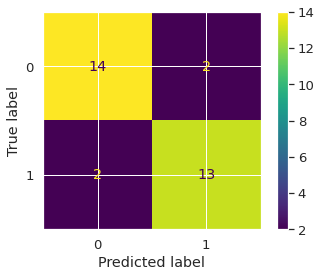

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.87      0.87      0.87        15

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



In [52]:
#probability of all values
pr = classifier.predict_proba(X_test)[0:10,:]
pr

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [53]:
#probability of zeros
pr = classifier.predict_proba(X_test)[0:10,0]
pr

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 0.])

In [54]:
#probability of ones
pr = classifier.predict_proba(X_test)[0:10,1]
pr

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 1.])

In [55]:
# mean_absolute_error
from sklearn.metrics import mean_absolute_error
meanabs =mean_absolute_error(y_test, y_pred)
# mean_squared_error
from sklearn.metrics import mean_squared_error
meansq =mean_squared_error(y_test, y_pred)
# median_absolute_error
from sklearn.metrics import median_absolute_error
medianab =median_absolute_error(y_test, y_pred)

In [56]:
print("The mean_absolute_error",meanabs)
print("The mean_Squre_error",meansq)
print("The Medain_absolute_error",medianab)

The mean_absolute_error 0.12903225806451613
The mean_Squre_error 0.12903225806451613
The Medain_absolute_error 0.0


## Using RandomForestClassifier

In [25]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier1.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', random_state=42)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1])

In [27]:
print('model_DT Train Score is : ' , classifier1.score(X_train, y_train))
print('model_DT Test Score is : ' , classifier1.score(X_test, y_test))

model_DT Train Score is :  1.0
model_DT Test Score is :  0.8709677419354839


In [28]:
print("The Score is: ",accuracy_score(y_test , y_pred)*100)

The Score is:  87.09677419354838


In [29]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm12 = confusion_matrix(y_test, y_pred)


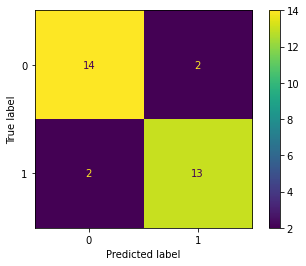

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.87      0.87      0.87        15

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



## Tuninig for Random forst

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [301,401,501],
    'max_depth' : [11,21,31],    
    'max_features' : ['sqrt','log2']
}

cv = GridSearchCV(estimator=classifier1, param_grid=param_grid, cv=5, n_jobs=-1)
cv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [11, 21, 31],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [301, 401, 501]})

In [32]:
# Predict again with the values of best parameters
rf_classifier_bst = RandomForestClassifier(n_estimators=501, n_jobs=-1,max_depth=21, max_features='log2', bootstrap=True, criterion='gini')
rf_classifier_bst.fit(X_train, y_train.values.ravel())
y_predict_bst = rf_classifier_bst.predict(X_test)

In [33]:
print('model_DT Train Score is : ' , rf_classifier_bst.score(X_train, y_train))
print('model_DT Test Score is : ' , rf_classifier_bst.score(X_test, y_test))

model_DT Train Score is :  1.0
model_DT Test Score is :  0.9032258064516129


In [34]:
print("The Score is: ",accuracy_score(y_test , y_predict_bst)*100)

The Score is:  90.32258064516128


In [35]:
cnf_matrix = confusion_matrix(y_test, y_predict_bst)
cnf_matrix

array([[13,  3],
       [ 0, 15]])

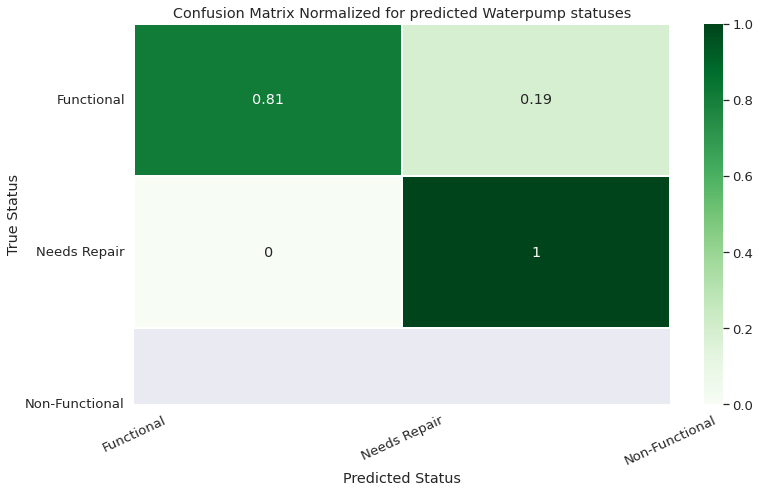

In [36]:
cnf_matrix = cnf_matrix.astype('float')  / cnf_matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(12,7))
sns.set(font_scale=1.2)
sns.heatmap(cnf_matrix, annot=True, cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Functional', 'Needs Repair', 'Non-Functional']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Status')
plt.ylabel('True Status')
plt.title('Confusion Matrix Normalized for predicted Waterpump statuses')
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_bst))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.83      1.00      0.91        15

    accuracy                           0.90        31
   macro avg       0.92      0.91      0.90        31
weighted avg       0.92      0.90      0.90        31



In [60]:
# mean_absolute_error
from sklearn.metrics import mean_absolute_error
meanabs =mean_absolute_error(y_test, y_pred)
# mean_squared_error
from sklearn.metrics import mean_squared_error
meansq =mean_squared_error(y_test, y_pred)
# median_absolute_error
from sklearn.metrics import median_absolute_error
medianab =median_absolute_error(y_test, y_pred)

In [61]:
print("The mean_absolute_error",meanabs)
print("The mean_Squre_error",meansq)
print("The Medain_absolute_error",medianab)


The mean_absolute_error 0.12903225806451613
The mean_Squre_error 0.12903225806451613
The Medain_absolute_error 0.0


## Using XAI

In [62]:
!pip install xai
!pip install xai_data
import sys, os
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

# Use below for charts in dark jupyter theme

THEME_DARK = False

if THEME_DARK:
    # This is used if Jupyter Theme dark is enabled. 
    # The theme chosen can be activated with jupyter theme as follows:
    # >>> jt -t oceans16 -T -nfs 115 -cellw 98% -N  -kl -ofs 11 -altmd
    font_size = '20.0'
    dark_theme_config = {
        "ytick.color" : "w",
        "xtick.color" : "w",
        "text.color": "white",
        'font.size': font_size,
        'axes.titlesize': font_size,
        'axes.labelsize': font_size, 
        'xtick.labelsize': font_size, 
        'ytick.labelsize': font_size, 
        'legend.fontsize': font_size, 
        'figure.titlesize': font_size,
        'figure.figsize': [20, 7],
        'figure.facecolor': "#384151",
        'legend.facecolor': "#384151",
        "axes.labelcolor" : "w",
        "axes.edgecolor" : "w"
    }
    plt.rcParams.update(dark_theme_config)

sys.path.append("..")

import xai
import xai.data

     |████████████████████████████████| 349 kB 4.5 MB/s            
     |████████████████████████████████| 10.3 MB 74.5 MB/s            
     |████████████████████████████████| 28.5 MB 46.9 MB/s            
     |████████████████████████████████| 11.3 MB 58.5 MB/s            
     |████████████████████████████████| 23.1 MB 48.0 MB/s            
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: p

In [64]:
categorical_cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
csv_columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

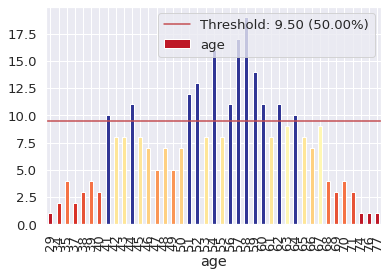

In [66]:
df_groups = xai.imbalance_plot(df, 'age', categorical_cols=categorical_cols)

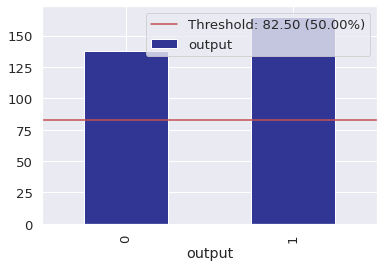

In [67]:
df_groups = xai.imbalance_plot(df, 'output', categorical_cols=categorical_cols)

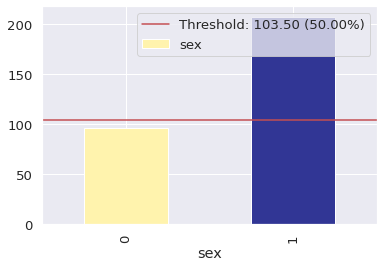

In [68]:
df_groups = xai.imbalance_plot(df, 'sex', categorical_cols=categorical_cols)

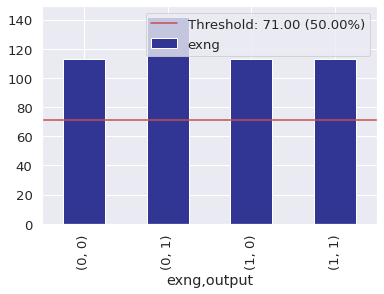

In [72]:
bal_df = xai.balance(df, "exng", "output", upsample=0.8, categorical_cols=categorical_cols)

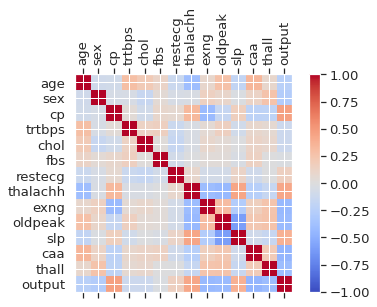

In [73]:
_ = xai.correlations(df, include_categorical=True, plot_type="matrix")

In [74]:
proc_df = xai.normalize_numeric(bal_df)
proc_df = xai.convert_categories(proc_df)
x = df.drop("output", axis=1)
y = df["output"]

In [77]:
x_train, y_train, x_test, y_test, train_idx, test_idx = \
    xai.balanced_train_test_split(
            x, y, "age", 
            min_per_group=1,
            max_per_group=1,
            categorical_cols=categorical_cols)

In [80]:
import sklearn
from sklearn.metrics import classification_report, mean_squared_error, roc_curve, auc

from keras.layers import Input, Dense, Flatten, \
    Concatenate, concatenate, Dropout, Lambda
from keras.models import Model, Sequential
from keras.layers.embeddings import Embedding

def build_model(X):
    input_els = []
    encoded_els = []
    dtypes = list(zip(X.dtypes.index, map(str, X.dtypes)))
    for k,dtype in dtypes:
        input_els.append(Input(shape=(1,)))
        if dtype == "int8":
            e = Flatten()(Embedding(X[k].max()+1, 1)(input_els[-1]))
        else:
            e = input_els[-1]
        encoded_els.append(e)
    encoded_els = concatenate(encoded_els)

    layer1 = Dropout(0.5)(Dense(100, activation="relu")(encoded_els))
    out = Dense(1, activation='sigmoid')(layer1)

    # train model
    model = Model(inputs=input_els, outputs=[out])
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    return model


def f_in(X, m=None):
    """Preprocess input so it can be provided to a function"""
    if m:
        return [X.iloc[:m,i] for i in range(X.shape[1])]
    else:
        return [X.iloc[:,i] for i in range(X.shape[1])]

def f_out(probs, threshold=0.5):
    """Convert probabilities into classes"""
    return list((probs >= threshold).astype(int).T[0])

In [82]:
model = build_model(x_train)

model.fit(f_in(x_train), y_train, epochs=1000, batch_size=512)

Epoch 1/1000
1/1 [==============================] - 1s 550ms/step - loss: 37.9719 - accuracy: 0.4868
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 33.9360 - accuracy: 0.4693
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 32.4291 - accuracy: 0.4825
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 29.2745 - accuracy: 0.4868
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 31.9678 - accuracy: 0.4386
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 27.9572 - accuracy: 0.4868
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 26.9599 - accuracy: 0.4737
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 25.2580 - accuracy: 0.4781
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 23.9067 - accuracy: 0.4474
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 21.9245 - accuracy: 0.4912
Epoch 1

In [83]:
score = model.evaluate(f_in(x_test), y_test, verbose=1)
print("Error %.4f: " % score[1])
print("Accuracy %.4f: " % (score[0]*100))

3/3 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.7467
Error 0.7467: 
Accuracy 70.3999: 


In [84]:
probabilities = model.predict(f_in(x_test))
pred = f_out(probabilities)

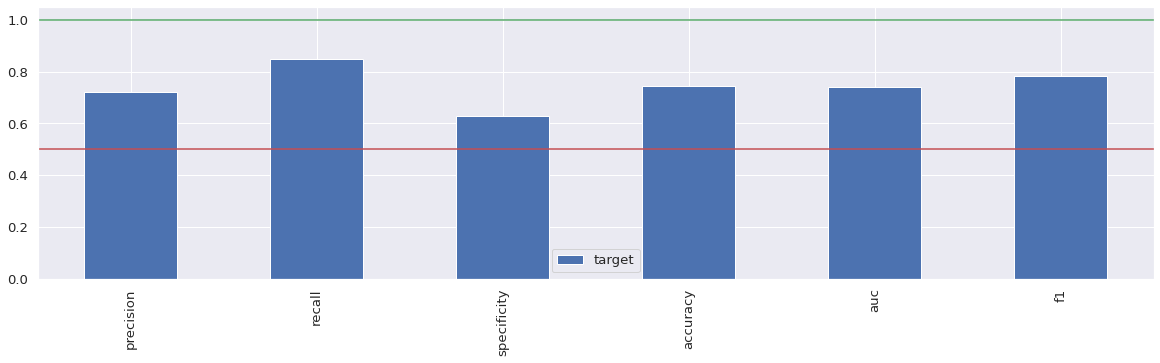

In [85]:
_= xai.metrics_plot(
        y_test, 
        probabilities)

In [86]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [87]:
protected = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'
            ]

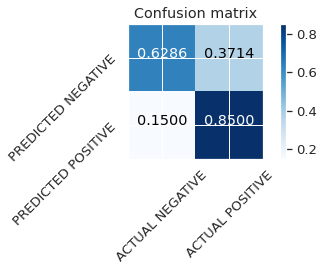

In [92]:
xai.confusion_matrix_plot(y_test, pred,scaled=True)

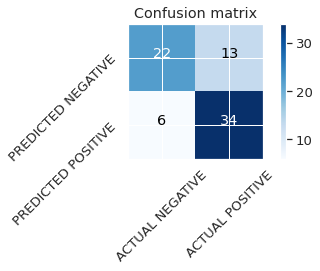

In [89]:
xai.confusion_matrix_plot(y_test, pred, scaled=False)

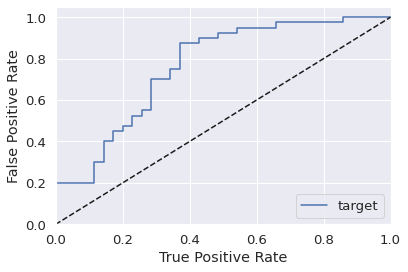

In [93]:
_ = xai.roc_plot(y_test, probabilities)

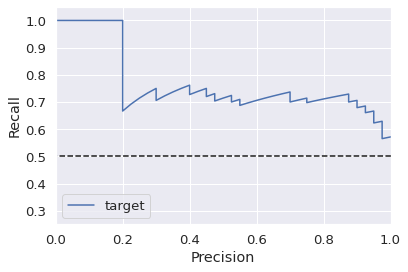

In [94]:
_= xai.pr_plot(y_test, probabilities)